# 项目二  清理和分析数据

## 项目简介

清洗推特用户 [@dog_rates](https://twitter.com/dog_rates)也叫做[WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)的推特数据，创建有趣可靠的分析和可视化。推特档案很大，但是只包括基本的推特信息。对 "Wow!" 进行收集、评估和清洗，是分析和可视化应该做的。

## 数据

### 完善推特档案

WeRateDogs 推特档案包括基本的推特信息，如 5000 多条推特，但并不包括所有数据。不过档案中有一列包括每个推特文本，我可以用来提取评级、狗的名字和 "地位" (即 doggo、floofer、pupper 和 puppo)。

### Twitter API 的附加数据

回到推特档案的基础信息：转发用户和喜爱用户是两个遗漏的列。幸运的是，从推特 API 中，任何人都可以收集到附加数据。其实，"任何人" 都能获取至少最近的 3000 条推特数据。但是因为你拥有 WeRateDogs 推特档案和专门的推特 ID，你可以收集到所有的 5000 多条推特。你将会查询推特的 API 收集这个重要数据。

### 图像预测文件

一件更酷的事情：我通过一个[神经网络](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)运行 WeRateDogs 推特档案中的所有图片，这个神经网络可以对狗的品种分类。结果：对图片预测 (只含前三名) 的表格包括每个推特 ID、图片 URL 和最自信预测对应的图片编号 (由于推特最多包含 4 个图片，所以编号为 1 到 4)。

## 收集

收集下面描述的三份数据：<br>
- 1.WeRateDogs 推特档案。
- 2.推特图片预测，即根据神经网络，出现在每个推特中狗的品种 (或其他物体、动物等)。
- 3.每条推特的数据，至少要包含转发数（retweet_count）和喜欢数（favorite_count），以及任何你觉得有趣的额外数据。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame
import tweepy
import requests
import time
import json
import timeit

In [232]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [233]:
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [2]:
#twitter-archive-enhanced
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#image-predictions
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
file_name = 'image-predictions.tsv'
r = requests.get(url)
with open(file_name, 'w') as file:
    file.write(r.text)

In [3]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [37]:
#retweet_count and favorite_count
file_name = 'tweet_json.txt'
error_file_name = 'error_tweet_id.txt'
data = {}
tweet_id_errors = []
start_time = time.time()
with open(file_name, 'w') as file:
    for tweet_id in twitter.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            data = {'tweet_id':int(tweet_id), 'retweet_count':tweet.retweet_count, 'favorite_count': tweet.favorite_count}
            json.dump(data, file)
            file.write('\n')
        except:
            tweet_id_errors.append(tweet_id)
end_time = time.time()
print('used_time', end_time - start_time)
with open(error_file_name, 'w') as file1:
    for line in tweet_id_errors:
        file1.write(str(line))
        file1.write('\n')

used_time 3269.092788219452


In [4]:
list_tweet_id = []
list_retweet_count = []
list_favorite_count = []
with open('tweet_json.txt', encoding='utf-8') as file:
    for line in file:
        data = line[:-1]
        data = eval(data)
        list_tweet_id.append(data['tweet_id'])
        list_retweet_count.append(data['retweet_count'])
        list_favorite_count.append(data['favorite_count'])
data = {'tweet_id':list_tweet_id, 'retweet_count':list_retweet_count, 'favorite_count':list_favorite_count}
tweet_data = pd.DataFrame(data)

## 评估

#### 可视化评估

In [5]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
tweet_data

,favorite_count,retweet_count,tweet_id
0,39093,8691,892420643555336193
1,33484,6381,892177421306343426
2,25238,4240,891815181378084864
3,42452,8793,891689557279858688
4,40617,9574,891327558926688256
5,20372,3177,891087950875897856
6,11941,2114,890971913173991426
7,66060,19267,890729181411237888
8,27964,4337,890609185150312448
9,32184,7563,890240255349198849


#### 编程评估

In [8]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
favorite_count    2343 non-null int64
retweet_count     2343 non-null int64
tweet_id          2343 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [11]:
twitter[twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter[twitter.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [14]:
twitter.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [15]:
list(twitter)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [16]:
twitter.text[22]

"I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba"

In [17]:
twitter[twitter.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [18]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predictions.p1

0            Welsh_springer_spaniel
1                           redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                miniature_pinscher
5              Bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English_setter
17                              hen
18                 desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        Ch

In [21]:
list(image_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [22]:
tweet_data[tweet_data.tweet_id.duplicated()]

,favorite_count,retweet_count,tweet_id


In [23]:
list(tweet_data)

['favorite_count', 'retweet_count', 'tweet_id']

In [24]:
tweet_data

,favorite_count,retweet_count,tweet_id
0,39093,8691,892420643555336193
1,33484,6381,892177421306343426
2,25238,4240,891815181378084864
3,42452,8793,891689557279858688
4,40617,9574,891327558926688256
5,20372,3177,891087950875897856
6,11941,2114,890971913173991426
7,66060,19267,890729181411237888
8,27964,4337,890609185150312448
9,32184,7563,890240255349198849


### 质量
#### `twitter` 表格
- 错误的数据类型（timestamp, retweeted_status_timestamp，tweet_id)
- 评级存在不正确的情况,如1663行
- rating_denominator数据有的不是10
- rating_denominator有数据等于0
- 存在不正确的name数据，例如index等于22的一行里name的值为such
- doggo,floofer,pupper,puppo存在数据不正确的情况
- text中存在网址链接url
- 对于空值应采用相同的表示（存在NaN与None两种方式）

#### `image_predictions` 表格
- p1,p2,p3中狗的名字用空格来连接而不是下划线_
- p1,p2,p3中狗名字首字母要大写，保持一致的格式


#### `tweet_data` 表格
- tweet_data缺少记录（部分推特id获取内容时异常造成）

### 清洁度
- `twitter` 表格中doggo,floofer,pupper,puppo应该用狗的地位stage来表示
- `twitter` 表格中rating_numerator和rating_denominator应该合并到一起，用rating表示。（此部分先不处理，等到相关评级质量问题解决后再处理）
- `twitter` 表格中应该去掉retweeted_status_id不为空的行
- `tweet_data` 表格中的数据应该整合到 `twitter` 表格中，属于`twitter` 表格的一部分
- `image_predictions` 表也应该合并到 `twitter` 表格中，并且 `twitter` 表格去掉没有image_predictions的部分（此部分放到最后面去处理）

## 清理

In [47]:
twitter_clean = twitter.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### 缺少数据

#### `tweet_data`： 缺少记录

##### 定义
在之前的程序中，将获取内容异常的tweet_id都存放在error_tweet_id.txt文件，在此将此文件内容导入DataFrame中去，并合并到tweet_data中去，favorite_count和retweet_count的值用NaN表示

##### 代码

In [48]:
tweet_id_errors = {}
list_id = []
list_nan = [np.nan]
with open('error_tweet_id.txt') as file:
    for line in file:
        list_id.append(int(line))
tweet_id_errors = {'tweet_id': list_id, 'favorite_count': len(list_id)*list_nan, 'retweet_count':len(list_id)*list_nan}
tweet_id_cut = pd.DataFrame(tweet_id_errors)
tweet_id_cut_clean = tweet_id_cut.copy()
tweet_data_clean = pd.concat([tweet_data_clean, tweet_id_cut_clean], ignore_index=True)

##### 测试

In [27]:
tweet_data_clean

,favorite_count,retweet_count,tweet_id
0,39093.0,8691.0,892420643555336193
1,33484.0,6381.0,892177421306343426
2,25238.0,4240.0,891815181378084864
3,42452.0,8793.0,891689557279858688
4,40617.0,9574.0,891327558926688256
5,20372.0,3177.0,891087950875897856
6,11941.0,2114.0,890971913173991426
7,66060.0,19267.0,890729181411237888
8,27964.0,4337.0,890609185150312448
9,32184.0,7563.0,890240255349198849


In [28]:
tweet_data_clean.tail(13)

,favorite_count,retweet_count,tweet_id
2343,NaN,NaN,888202515573088257
2344,NaN,NaN,873697596434513921
2345,NaN,NaN,869988702071779329
2346,NaN,NaN,866816280283807744
2347,NaN,NaN,861769973181624320
2348,NaN,NaN,842892208864923648
2349,NaN,NaN,837012587749474308
2350,NaN,NaN,828376505180889089
2351,NaN,NaN,827228250799742977
2352,NaN,NaN,802247111496568832


### 清洁度

#### `twitter` 表格中doggo,floofer,pupper,puppo应该用狗的地位stage来表示

##### 定义
由于doggo,floofer,pupper,puppo几列的值存在很多不正确的情况，所以在此直接删除doggo,floofer,pupper,puppo几列，并新增stage一列，其值先用NaN代替，
在后续的质量问题中再进行解决，写入正确的狗的“地位”。

##### 代码

In [49]:
twitter_clean = twitter_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
twitter_clean['stage'] = np.nan

##### 测试

In [30]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [31]:
twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN


#### `tweet_data` 表格中的数据应该整合到 `twitter` 表格中，属于twitter 表格的一部分

##### 定义
利用merge方法按照tweet_id将 `tweet_data` 表格中的favorite_count	retweet_count两列合并到 `twitter` 表格中。

##### 代码

In [50]:
twitter_clean = pd.merge(twitter_clean, tweet_data_clean, how='left', on='tweet_id')

##### 测试

In [33]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39093.0,8691.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33484.0,6381.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25238.0,4240.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42452.0,8793.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40617.0,9574.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,20372.0,3177.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,11941.0,2114.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,66060.0,19267.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,27964.0,4337.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,NaN,32184.0,7563.0


In [34]:
twitter_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
2234,668190681446379520,NaN,NaN,2015-11-21 22:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skittles. I would kidnap Skittles. Pin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668190681...,12,10,Skittles,NaN,681.0,207.0
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,NaN,12932.0,3444.0
459,817827839487737858,NaN,NaN,2017-01-07 20:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He ran into a glass door once. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817827839...,13,10,Buddy,NaN,56846.0,30754.0
1805,676942428000112642,NaN,NaN,2015-12-16 01:50:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who leaves the last cupcake just sitting there...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676942428...,9,10,None,NaN,2217.0,844.0
1387,700505138482569216,NaN,NaN,2016-02-19 02:20:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,NaN,2451.0,633.0
1971,673270968295534593,NaN,NaN,2015-12-05 22:41:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673270968...,11,10,Mac,NaN,1114.0,396.0
711,784517518371221505,NaN,NaN,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,NaN,9887.0,2891.0
1958,673580926094458881,NaN,NaN,2015-12-06 19:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you ask your professor about extra credit...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673580926...,8,10,None,NaN,868.0,291.0
1425,697943111201378304,NaN,NaN,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,NaN,2593.0,764.0
405,823939628516474880,NaN,NaN,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/823939628...,12,10,Cash,NaN,11602.0,3059.0


In [35]:
twitter_clean[twitter_clean.favorite_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,NaN,NaN,NaN
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,NaN,NaN,NaN
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,NaN,NaN,NaN
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,NaN,NaN
298,837012587749474308,NaN,NaN,2017-03-01 18:52:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KennyFromDaBlok: 14/10 h*ckin good hats. w...,8.370113e+17,7.266347e+08,2017-03-01 18:47:10 +0000,https://twitter.com/KennyFromDaBlok/status/837...,14,10,None,NaN,NaN,NaN
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,NaN,NaN,NaN
382,827228250799742977,NaN,NaN,2017-02-02 18:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Phil. He's an important...,6.946697e+17,4.196984e+09,2016-02-02 23:52:22 +0000,https://twitter.com/dog_rates/status/694669722...,12,10,Phil,NaN,NaN,NaN
566,802247111496568832,NaN,NaN,2016-11-25 20:26:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everybody drop what you're doin...,7.790561e+17,4.196984e+09,2016-09-22 20:33:42 +0000,https://twitter.com/dog_rates/status/779056095...,13,10,None,NaN,NaN,NaN


#### `twitter`  表格中应该去掉retweeted_status_id不为空的行

##### 定义
利用drop函数去除retweeted_status_id不为NaN的行

##### 代码

In [51]:
for index in twitter_clean[twitter_clean.retweeted_status_id.notnull()].index:
    twitter_clean.drop(index, axis=0, inplace=True)

##### 测试

In [37]:
twitter_clean.retweeted_status_id.notnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: retweeted_status_id, Length: 2175, dtype: bool

In [38]:
twitter_clean.retweeted_status_id.notnull().any()

False

In [39]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         0 non-null float64
favorite_count                2172 non-null float64
retweet_count                 2172 non-null float64
dtypes: float64(7), int64(3), object(6)
memory usage: 368.9+ KB


### 质量

#### 错误的数据类型（timestamp, retweeted_status_timestamp, tweet_id)

##### 定义
使用pd.to_datetime方法将timestamp和retweeted_status_timestamp转为datetime数据类型，将tweet_id改为str

##### 代码

In [52]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)
twitter_clean.retweeted_status_timestamp = pd.to_datetime(twitter_clean.retweeted_status_timestamp)
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

##### 测试

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
stage                         0 non-null float64
favorite_count                2172 non-null float64
retweet_count                 2172 non-null float64
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage:

In [42]:
twitter_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
30     2017-07-15 16:51:35
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

In [43]:
twitter_clean.retweeted_status_timestamp

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
5      NaT
6      NaT
7      NaT
8      NaT
9      NaT
10     NaT
11     NaT
12     NaT
13     NaT
14     NaT
15     NaT
16     NaT
17     NaT
18     NaT
20     NaT
21     NaT
22     NaT
23     NaT
24     NaT
25     NaT
26     NaT
27     NaT
28     NaT
29     NaT
30     NaT
        ..
2326   NaT
2327   NaT
2328   NaT
2329   NaT
2330   NaT
2331   NaT
2332   NaT
2333   NaT
2334   NaT
2335   NaT
2336   NaT
2337   NaT
2338   NaT
2339   NaT
2340   NaT
2341   NaT
2342   NaT
2343   NaT
2344   NaT
2345   NaT
2346   NaT
2347   NaT
2348   NaT
2349   NaT
2350   NaT
2351   NaT
2352   NaT
2353   NaT
2354   NaT
2355   NaT
Name: retweeted_status_timestamp, Length: 2175, dtype: datetime64[ns]

In [44]:
twitter_clean.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
30      886267009285017600
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

#### 评级存在不正确的情况, 如1663行
#### rating_denominator数据有的不是10,
#### rating_denominator有数据等于0

##### 定义
由于上述几个问题都属于狗的评级问题，因此放在一起处理。使用正则表达式和 pandas 的 str.extract 方法从text一列中提取评级分数，在这里统一采用10分制，即分母为10，其他分数都转为分母为10的情况，分子有小数的四舍五入。

##### 代码

In [55]:
#首先处理那些由于text中存在两个评级，从而导致不正确评级的情况
rating_1 = twitter_clean.text.str.extract('([0-9]+/[0-9]+)', expand = True)
rating_2 = twitter_clean.text.str.extract('.*[0-9]+/[0-9]+\D+([[0-9]+/[0-9]+)', expand = True)
rating_1.columns = ['rating1']
rating_2.columns = ['rating2']
rating = pd.merge(rating_1, rating_2, how='inner', left_index=True, right_index=True)
#rating[rating.rating2.notnull()]

#在此规定，存在两个评级时且后面评级的分母为10时，很可能后面的评级是正确的
rating['rating_numerator'], rating['rating_denominator'] = rating.rating2.str.split('/', 1).str
for index in rating[rating.rating2.notnull()].index:
    twitter_clean.loc[index,'rating_numerator'] = int(rating.rating_numerator.loc[index])
    twitter_clean.loc[index,'rating_denominator'] = int(rating.rating_denominator.loc[index])

In [63]:
#其次处理由于其他原因导致的评级不正确的情况
#观察数据，342行不存在评级，516行为24/7不合理,在此设为0/10，1663行数据有误，
twitter_clean.loc[342,'rating_numerator'] = 0
twitter_clean.loc[342,'rating_denominator'] = 10
twitter_clean.loc[516,'rating_numerator'] = 0
twitter_clean.loc[516,'rating_denominator'] = 10
twitter_clean.loc[342,'rating_numerator'] = (20/16)*10
twitter_clean.loc[342,'rating_denominator'] = 10 
#其余的均则可以转为10分制4
for index in twitter_clean[twitter_clean.rating_denominator != 10].index:
    twitter_clean.loc[index,'rating_numerator'] = (twitter_clean.rating_numerator.loc[index]/twitter_clean.rating_denominator.loc[index])*10
    twitter_clean.loc[index,'rating_denominator'] = 10
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype(int)

##### 测试

In [64]:
twitter_clean[twitter_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count


In [65]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39093.0,8691.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33484.0,6381.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25238.0,4240.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42452.0,8793.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40617.0,9574.0


In [66]:
twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN,109.0,40.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,304.0,142.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,126.0,46.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,131.0,48.0
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,None,NaN,2527.0,518.0


In [67]:
twitter_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
1257,710296729921429505,NaN,NaN,2016-03-17 02:48:31,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oshie. 12/10 please enjoy (vid by @cat...,NaN,NaN,NaT,https://vine.co/v/iw9hUFAMerV,12,10,Oshie,NaN,2542.0,817.0
1613,685315239903100929,NaN,NaN,2016-01-08 04:21:00,"<a href=""http://twitter.com/download/iphone"" r...",I would like everyone to appreciate this pup's...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/685315239...,11,10,None,NaN,3613.0,1209.0
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,NaN,406.0,126.0
1923,674082852460433408,NaN,NaN,2015-12-08 04:27:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674082852...,11,10,a,NaN,786.0,182.0
1784,677662372920729601,NaN,NaN,2015-12-18 01:31:14,"<a href=""http://twitter.com/download/iphone"" r...",In honor of the new Star Wars movie. Here's Yo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/677662372...,12,10,None,NaN,2097.0,1079.0
1682,681891461017812993,NaN,NaN,2015-12-29 17:36:07,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,NaN,2658.0,934.0
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,NaN,13699.0,2560.0
1442,696754882863349760,NaN,NaN,2016-02-08 17:58:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Reptar. He specifically asked for his ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/696754882...,10,10,Reptar,NaN,1587.0,392.0
1972,673240798075449344,NaN,NaN,2015-12-05 20:41:29,"<a href=""http://twitter.com/download/iphone"" r...",Magical floating dog here. Very calm. Always h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673240798...,6,10,None,NaN,1484.0,782.0
1079,739238157791694849,NaN,NaN,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/739238157...,13,10,None,NaN,73941.0,51460.0


#### 存在不正确的name数据，例如index等于22的一行里name的值为such

##### 定义
使用正则表达式和 pandas 的 str.extract 方法从text一列中提取name,对于图中存在两个名字的情况，使用逗号,符号来连接，如：name1,name2。

###### 代码

In [68]:
#对于图中存在两个名字的情况，使用&符号来连接，如：name1&name2
name_data_1 = twitter_clean.text.str.extract('This is (\S*)\.', expand = True)
name_data_1.columns=['name']
name_data_2 = twitter_clean.text.str.extract('Meet (\S*)\.', expand = True)
name_data_2.columns=['name']
name_data_3 = twitter_clean.text.str.extract('Meet\s(\S*)\s&amp;\s(\S*)\.', expand = True)
name_data_3.columns=['name1','name2']

twitter_clean.name = name_data_1.name
for index in name_data_2[name_data_2.name.notnull()].index:
    twitter_clean.loc[index,'name'] = name_data_2.name.loc[index]
    
for index in name_data_3[name_data_3.name2.notnull()].index:
    twitter_clean.loc[index,'name'] = name_data_3.name1.loc[index] + ',' + name_data_3.name2.loc[index]

##### 测试

In [69]:
twitter_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
30           NaN
          ...   
2326         NaN
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

In [70]:
twitter_clean.name.sample(15)

1442      Reptar
1721      Reggie
313          NaN
445         Finn
1950       Larry
1502       Teddy
2147     Chester
2164     Oliviér
3          Darla
1129    Pupcasso
580          NaN
1052    Maxaroni
1018         NaN
122        Gizmo
2028       Dylan
Name: name, dtype: object

#### doggo,floofer,pupper,puppo存在数据不正确的情况

##### 定义
使用正则表达式和 pandas 的 str.extract 方法从text一列中提取doggo,floofer,pupper,puppo,需要注意会有puppo和doggo同时出现的情况

###### 代码

In [71]:
s1 = twitter_clean.text.str.extract('(doggo)', expand=True)
s1.columns = ['stage']
s2 = twitter_clean.text.str.extract('(floof)', expand=True)
s2.columns = ['stage']
s3 = twitter_clean.text.str.extract('(pupper)', expand=True)
s3.columns = ['stage']
s4 = twitter_clean.text.str.extract('(puppo)', expand=True)
s4.columns = ['stage']

for index in s1[s1.stage.notnull()].index:
    twitter_clean.loc[index, 'stage'] = s1.stage.loc[index]
for index in s2[s2.stage.notnull()].index:
    twitter_clean.loc[index, 'stage'] = s2.stage.loc[index]
for index in s3[s3.stage.notnull()].index:
    twitter_clean.loc[index, 'stage'] = s3.stage.loc[index]
for index in s4[s4.stage.notnull()].index:
    twitter_clean.loc[index, 'stage'] = s4.stage.loc[index]

In [72]:
#查看puppo和doggo同时出现的情况
s5 = twitter_clean.text.str.extract('(puppo).*(doggo)', expand=True)
s5.columns = ['stage1', 'satge2']
s5[s5.stage1.notnull()]

,stage1,satge2
172,puppo,doggo
191,puppo,doggo


In [73]:
twitter_clean.loc[172].text

"I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq"

In [74]:
twitter_clean.loc[191].text

"Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"

In [75]:
twitter_clean.loc[172, 'stage'] = 'doggo'
twitter_clean.loc[191, 'stage'] = 'puppo'

##### 测试

In [76]:
twitter_clean.stage

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25       floof
26         NaN
27         NaN
28         NaN
29      pupper
30         NaN
         ...  
2326       NaN
2327       NaN
2328       NaN
2329       NaN
2330       NaN
2331       NaN
2332       NaN
2333       NaN
2334       NaN
2335       NaN
2336       NaN
2337       NaN
2338       NaN
2339       NaN
2340       NaN
2341       NaN
2342       NaN
2343       NaN
2344       NaN
2345       NaN
2346       NaN
2347       NaN
2348       NaN
2349       NaN
2350       NaN
2351       NaN
2352       NaN
2353       NaN
2354       NaN
2355       NaN
Name: stage, Length: 2175, dtype: object

In [77]:
twitter_clean.loc[12].text

"Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm"

In [78]:
twitter_clean.stage.sample(15)

679       NaN
1267    floof
1728      NaN
838       NaN
1038      NaN
1835      NaN
585     doggo
300     doggo
2160      NaN
680       NaN
1520      NaN
170       NaN
1341      NaN
1162      NaN
579       NaN
Name: stage, dtype: object

#### text中存在网址链接url

##### 定义
使用正则表达式和pandas的repalce方法匹配url，然后删除它

##### 代码

In [79]:
twitter_clean.text.replace(r'https.*','',regex=True, inplace=True)

##### 测试

In [80]:
twitter_clean.text.str.extract('(https)',expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [81]:
twitter_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaT,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,pupper,14104.0,6491.0
179,857214891891077121,8.571567e+17,180670967.0,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaT,NaN,12,10,NaN,NaN,239.0,20.0
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaT,https://vine.co/v/ienexVMZgi5,12,10,NaN,NaN,1589.0,510.0
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,NaN,2535.0,243.0
517,810896069567610880,NaN,NaN,2016-12-19 17:14:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He just found out he needs bra...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/810896069...,11,10,Hunter,NaN,9960.0,2037.0
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/673656262...,10,10,NaN,pupper,754.0,262.0
1209,715696743237730304,NaN,NaN,2016-04-01 00:26:15,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,NaN,4195.0,1428.0
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,NaN,4644.0,1791.0
502,813081950185472002,NaN,NaN,2016-12-25 18:00:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/813081950...,11,10,Baron,NaN,10836.0,3151.0
748,779377524342161408,NaN,NaN,2016-09-23 17:50:56,"<a href=""http://twitter.com/download/iphone"" r...",Have you ever seen such a smol pupper? Portabl...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/779377524...,12,10,NaN,pupper,9698.0,3535.0


In [82]:
twitter_clean.loc[12].text

"Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 "

#### 对于空值应采用相同的表示（存在NaN与None两种方式）

##### 定义
此问题在上面的清理过程中已经得到解决了

##### 测试

In [83]:
twitter_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39093.0,8691.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33484.0,6381.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,25238.0,4240.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,42452.0,8793.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,40617.0,9574.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,20372.0,3177.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,11941.0,2114.0
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,66060.0,19267.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,27964.0,4337.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,32184.0,7563.0


#### p1,p2,p3中狗的名字用空格来连接而不是下划线_


##### 定义
使用repalce方法，将p1,p2,p3中名字的下划线用空格来替代

###### 代码

In [84]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.replace(r'_', ' ')
image_predictions_clean.p2 = image_predictions_clean.p2.str.replace(r'_', ' ')
image_predictions_clean.p3 = image_predictions_clean.p3.str.replace(r'_', ' ')

##### 测试

In [85]:
image_predictions_clean.p1

0            Welsh springer spaniel
1                           redbone
2                   German shepherd
3               Rhodesian ridgeback
4                miniature pinscher
5              Bernese mountain dog
6                        box turtle
7                              chow
8                     shopping cart
9                  miniature poodle
10                 golden retriever
11                    Gordon setter
12                     Walker hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English setter
17                              hen
18                 desktop computer
19                Italian greyhound
20                      Maltese dog
21                 three-toed sloth
22                               ox
23                 golden retriever
24                         malamute
25                       guinea pig
26      soft-coated wheaten terrier
27                        Ch

In [86]:
image_predictions_clean.p1.sample(15)

964                         Samoyed
1262    German short-haired pointer
1058                 Great Pyrenees
649                       Chihuahua
1919          flat-coated retriever
2004                         Saluki
1516               golden retriever
913                          kuvasz
997                             pug
1769               golden retriever
812                  Siberian husky
292                       Chihuahua
1291             Labrador retriever
1672                          dingo
967                        Pembroke
Name: p1, dtype: object

In [87]:
image_predictions_clean.p2

0                         collie
1             miniature pinscher
2                       malinois
3                        redbone
4                     Rottweiler
5               English springer
6                     mud turtle
7                Tibetan mastiff
8                shopping basket
9                       komondor
10               Tibetan mastiff
11             Yorkshire terrier
12              English foxhound
13                  bull mastiff
14               German shepherd
15                      Shih-Tzu
16                  Newfoundland
17                          cock
18                          desk
19                   toy terrier
20                    toy poodle
21                         otter
22                  Newfoundland
23      Chesapeake Bay retriever
24                Siberian husky
25                         skunk
26                  Afghan hound
27                   toy terrier
28                    bloodhound
29                    barracouta
          

In [88]:
image_predictions_clean.p2.sample(15)

742                           boxer
1806    German short-haired pointer
1864                     Pomeranian
1387               miniature poodle
699                  English setter
1780       Chesapeake Bay retriever
1553             Labrador retriever
1302                       malinois
1285                       Cardigan
537                         macaque
780              Labrador retriever
376                         bathtub
1044                         kuvasz
203                     toilet seat
468                  English setter
Name: p2, dtype: object

In [89]:
image_predictions_clean.p3

0                 Shetland sheepdog
1               Rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          Doberman
5        Greater Swiss Mountain dog
6                          terrapin
7                          fur coat
8                  golden retriever
9       soft-coated wheaten terrier
10               Labrador retriever
11                         Pekinese
12                     Ibizan hound
13                   French bulldog
14                         malinois
15                   Dandie Dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature poodle
21                   great grey owl
22                      groenendael
23               Labrador retriever
24                       Eskimo dog
25                          hamster
26                           briard
27                         p

In [90]:
image_predictions_clean.p3.sample(15)

1898                    French bulldog
441                         toy poodle
562     American Staffordshire terrier
954                   Mexican hairless
221                               chow
1461                            muzzle
680                         schipperke
624     American Staffordshire terrier
445                 Labrador retriever
572                             kelpie
1419                       soccer ball
16                              borzoi
2042                            kuvasz
1623                    Great Pyrenees
1294                       Siamese cat
Name: p3, dtype: object

#### p1,p2,p3中狗名字首字母要大写，保持一致的格式

##### 定义
使用title方法，将p1,p2,p3中名字的每个字的首字母大写。

###### 代码

In [91]:
image_predictions_clean.p1 = image_predictions_clean.p1.str.title()
image_predictions_clean.p2 = image_predictions_clean.p2.str.title()
image_predictions_clean.p3 = image_predictions_clean.p3.str.title()

##### 测试

In [92]:
image_predictions_clean.p1

0            Welsh Springer Spaniel
1                           Redbone
2                   German Shepherd
3               Rhodesian Ridgeback
4                Miniature Pinscher
5              Bernese Mountain Dog
6                        Box Turtle
7                              Chow
8                     Shopping Cart
9                  Miniature Poodle
10                 Golden Retriever
11                    Gordon Setter
12                     Walker Hound
13                              Pug
14                       Bloodhound
15                            Lhasa
16                   English Setter
17                              Hen
18                 Desktop Computer
19                Italian Greyhound
20                      Maltese Dog
21                 Three-Toed Sloth
22                               Ox
23                 Golden Retriever
24                         Malamute
25                       Guinea Pig
26      Soft-Coated Wheaten Terrier
27                        Ch

In [93]:
image_predictions_clean.p2

0                         Collie
1             Miniature Pinscher
2                       Malinois
3                        Redbone
4                     Rottweiler
5               English Springer
6                     Mud Turtle
7                Tibetan Mastiff
8                Shopping Basket
9                       Komondor
10               Tibetan Mastiff
11             Yorkshire Terrier
12              English Foxhound
13                  Bull Mastiff
14               German Shepherd
15                      Shih-Tzu
16                  Newfoundland
17                          Cock
18                          Desk
19                   Toy Terrier
20                    Toy Poodle
21                         Otter
22                  Newfoundland
23      Chesapeake Bay Retriever
24                Siberian Husky
25                         Skunk
26                  Afghan Hound
27                   Toy Terrier
28                    Bloodhound
29                    Barracouta
          

In [94]:
image_predictions_clean.p3

0                 Shetland Sheepdog
1               Rhodesian Ridgeback
2                        Bloodhound
3                Miniature Pinscher
4                          Doberman
5        Greater Swiss Mountain Dog
6                          Terrapin
7                          Fur Coat
8                  Golden Retriever
9       Soft-Coated Wheaten Terrier
10               Labrador Retriever
11                         Pekinese
12                     Ibizan Hound
13                   French Bulldog
14                         Malinois
15                   Dandie Dinmont
16                           Borzoi
17                        Partridge
18                         Bookcase
19                          Basenji
20                 Miniature Poodle
21                   Great Grey Owl
22                      Groenendael
23               Labrador Retriever
24                       Eskimo Dog
25                          Hamster
26                           Briard
27                         P

### 再次清洁度

#### twitter 表格中rating_numerator和rating_denominator应该合并到一起，用rating表示

##### 定义
使用rating_numerator/rating_denominator的形式来表示rating,然后再删除rating_numerator和rating_denominator两列

##### 代码

In [95]:
twitter_clean['rating'] = twitter_clean['rating_numerator'].astype(str) + '/' + twitter_clean['rating_denominator'].astype(str)
twitter_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

##### 测试

In [96]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,39093.0,8691.0,13/10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,33484.0,6381.0,13/10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,25238.0,4240.0,12/10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,42452.0,8793.0,13/10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,40617.0,9574.0,12/10


In [97]:
twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,NaN,NaN,109.0,40.0,5/10
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,NaN,NaN,304.0,142.0,6/10
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,NaN,NaN,126.0,46.0,9/10
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,NaN,NaN,131.0,48.0,7/10
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,NaN,NaN,2527.0,518.0,8/10


In [98]:
twitter_clean.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
1160,724004602748780546,NaN,NaN,2016-04-23 22:38:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Luther. He saw a ghost. Spooked af. 11...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/724004602...,Luther,pupper,4491.0,1755.0,11/10
1529,690248561355657216,NaN,NaN,2016-01-21 19:04:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxwell. That's his moped. He rents it...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/690248561...,Maxwell,NaN,1818.0,461.0,11/10
593,798925684722855936,NaN,NaN,2016-11-16 16:28:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadow. He's a firm believer that they...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/798925684...,Shadow,NaN,8178.0,1638.0,11/10
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/760190180...,Sadie,NaN,6237.0,2031.0,10/10
1273,709207347839836162,NaN,NaN,2016-03-14 02:39:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's trying on her prom dress....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/709207347...,Penny,NaN,13567.0,6446.0,11/10
1919,674269164442398721,NaN,NaN,2015-12-08 16:47:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674269164...,Bob,NaN,943.0,250.0,8/10
2022,672068090318987265,NaN,NaN,2015-12-02 15:01:33,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's upset because he's no...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672068090...,NaN,NaN,1362.0,553.0,7/10
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/709198395...,NaN,NaN,2597.0,707.0,9/10
1205,715928423106027520,NaN,NaN,2016-04-01 15:46:52,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He's a Yorkshire Piccolope. 1...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/715928423...,Bubbles,NaN,3435.0,973.0,11/10
996,748337862848962560,NaN,NaN,2016-06-30 02:10:24,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek,NaN,NaN,NaT,https://vine.co/v/h5aDaFthX6O,NaN,NaN,8329.0,4613.0,13/10


#### image_predictions 表也应该合并到 twitter 表格中，并且 twitter 表格去掉没有image_predictions的部分

##### 定义
使用merge方法将 `image_predictions` 表格合并到 `twitter` 表格中去

##### 代码

In [99]:
twitter_clean = pd.merge(image_predictions_clean, twitter_clean, left_index=True,right_index=True)

##### 测试

In [100]:
twitter_clean.head()

,tweet_id_x,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,39093.0,8691.0,13/10
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,...,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,33484.0,6381.0,13/10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,25238.0,4240.0,12/10
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,...,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,42452.0,8793.0,13/10
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,40617.0,9574.0,12/10


In [101]:
twitter_clean.tail()

,tweet_id_x,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,...,Two miniature golden retrievers here. Webbed p...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671122204...,NaN,NaN,3661.0,2714.0,4/10
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,...,"Meet Phred. He isn't steering, looking at the ...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/671115716...,Phred,NaN,1410.0,826.0,6/10
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,...,This is Toby. He asked for chocolate cake for ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671109016...,Toby,NaN,1200.0,472.0,8/10
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,...,Yea I can't handle this job anymore your dogs ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670995969...,NaN,NaN,1155.0,312.0,12/10
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,...,After so many requests... here you go.\n\nGood...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670842764...,NaN,NaN,25722.0,9415.0,420/10


In [102]:
twitter_clean.sample(15)

,tweet_id_x,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,American Staffordshire Terrier,0.925505,True,Staffordshire Bullterrier,0.036221,True,Italian Greyhound,...,This is by far the most coordinated series of ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680085611...,NaN,NaN,13770.0,9864.0,12/10
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,Chesapeake Bay Retriever,0.371146,True,Water Buffalo,0.099596,False,Weimaraner,...,This is Cooper. He likes to stick his tongue o...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/808001312...,Cooper,NaN,13811.0,4019.0,12/10
167,668986018524233728,https://pbs.twimg.com/media/CUi3PIrWoAAPvPT.jpg,1,Doormat,0.976103,False,Chihuahua,0.005640,True,Norfolk Terrier,...,Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/859851578...,Trooper,NaN,15909.0,3714.0,13/10
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,Malamute,0.841597,True,Siberian Husky,0.073644,True,Eskimo Dog,...,This is Earl. Earl is lost. Someone help Earl....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/674063288...,Earl,NaN,6707.0,2408.0,5/10
1299,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,Swing,0.999984,False,Labrador Retriever,0.000010,True,Eskimo Dog,...,He's doing his best. 12/10 very impressive tha...,NaN,NaN,NaT,https://vine.co/v/hUvHKYrdb1d,NaN,NaN,4415.0,2733.0,12/10
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland Sheepdog,0.963985,True,Collie,0.026206,True,Border Collie,...,This is Kanu. He's a Freckled Ticonderoga. Sim...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/713919462...,Kanu,NaN,3504.0,856.0,12/10
508,676098748976615425,https://pbs.twimg.com/media/CWH8L72UkAAvjql.jpg,1,Walking Stick,0.162179,False,Sandal,0.129086,False,Purse,...,I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaT,https://m.facebook.com/story.php?story_fbid=18...,NaN,NaN,6696.0,1396.0,13/10
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,Gas Pump,0.676439,False,Harvester,0.049995,False,Swing,...,Meet Opal. He's a Belgian Dijon Poofster. Upse...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/687664829...,Opal,NaN,2094.0,570.0,11/10
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,Chow,0.999837,True,Tibetan Mastiff,0.000117,True,Australian Terrier,...,This is Clark. He's deadly af. Clearly part sh...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/747204161...,Clark,NaN,3670.0,1021.0,10/10
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,Golden Retriever,0.964929,True,Labrador Retriever,0.011584,True,Refrigerator,...,This is Colin. He really likes green beans. It...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/695314793...,Colin,NaN,3936.0,1643.0,10/10


### 保存数据

In [104]:
save_file_name = 'twitter_archive_master.csv'
twitter_clean.to_csv(save_file_name, encoding='utf-8',index=False)

## 数据分析与可视化

In [105]:
data = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')

In [106]:
data

,tweet_id_x,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,favorite_count,retweet_count,rating
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,...,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,39093.0,8691.0,13/10
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,...,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,33484.0,6381.0,13/10
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,...,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,25238.0,4240.0,12/10
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,...,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,42452.0,8793.0,13/10
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,40617.0,9574.0,12/10
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,...,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,20372.0,3177.0,13/10
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,...,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,11941.0,2114.0,13/10
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,...,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,66060.0,19267.0,13/10
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,...,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,27964.0,4337.0,13/10
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,...,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,32184.0,7563.0,14/10


##### favorite_count与retweet_count

In [107]:
data.favorite_count.describe()

count      1894.000000
mean       9867.963041
std       12896.314690
min          51.000000
25%        2572.000000
50%        4904.000000
75%       12338.500000
max      144166.000000
Name: favorite_count, dtype: float64

In [108]:
data.retweet_count.describe()

count     1894.000000
mean      3066.891763
std       4932.485299
min          0.000000
25%        785.250000
50%       1593.500000
75%       3511.500000
max      78187.000000
Name: retweet_count, dtype: float64

从上述结果来看，favorite_count的均值为9867.963041，retweet_count的均值为3066.891763，以及各自的最大值来看，总体上favorite_count要大于retweet_count，也就是说人们更加倾向于“点赞”，而不是去转发。

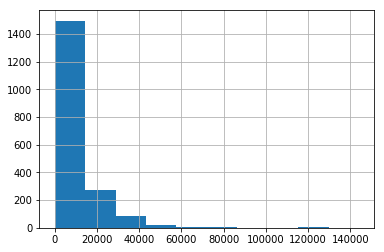

In [109]:
data.favorite_count.hist().get_figure().savefig('plot1.png')

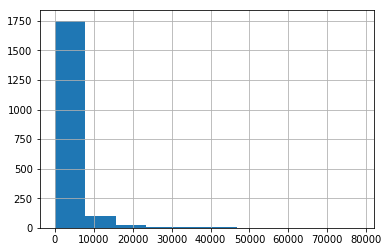

In [110]:
data.retweet_count.hist().get_figure().savefig('plot2.png')

从上述两张图中，可以更加清晰地看出favorite_count要大于retweet_count，从而更加能够证明上述观点。

##### 狗狗的“地位”

In [111]:
data.stage.value_counts()

pupper    249
doggo      79
puppo      31
floof      23
Name: stage, dtype: int64

从上述结果来看，在tweet中有给出狗的地位的信息中，可以得知大部分的狗属于pupper，结合各stage的解释，也就是大部分的狗狗都是younger，年纪比较小。

##### 评级

In [112]:
rating_numerator, rating_denominator = data['rating'].str.split('/', 1).str
rating_numerator = rating_numerator.astype(int)

In [113]:
rating_numerator.describe()

count    1896.000000
mean       12.707806
std        45.454283
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

从评级上来看，总体的评级分数分子都是要大于分母的，也就是大于10分，说明人们对于狗狗的喜爱，更加倾向于给予更多的分数去鼓励人们，说明人们内心都是向往美好的事物。

#### 图片算法预测

In [114]:
data.p1_conf.describe()

count    1896.000000
mean        0.600421
std         0.269476
min         0.044333
25%         0.369628
50%         0.599521
75%         0.848712
max         1.000000
Name: p1_conf, dtype: float64

In [115]:
data.p2_conf.describe()

count    1.896000e+03
mean     1.340285e-01
std      1.000261e-01
min      1.011300e-08
25%      5.295590e-02
50%      1.178485e-01
75%      1.960660e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [116]:
data.p3_conf.describe()

count    1.896000e+03
mean     5.985643e-02
std      5.059723e-02
min      1.740170e-10
25%      1.616933e-02
50%      4.893965e-02
75%      9.174633e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

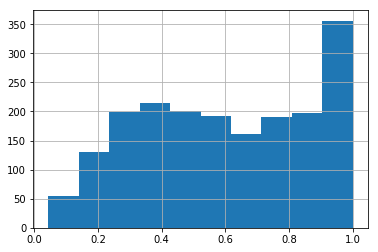

In [117]:
data.p1_conf.hist().get_figure().savefig('plot3.png')

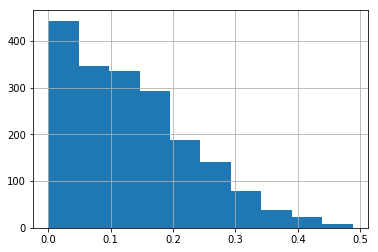

In [118]:
data.p2_conf.hist().get_figure().savefig('plot4.png')

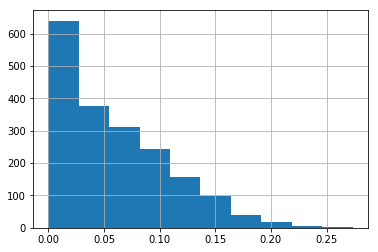

In [119]:
data.p3_conf.hist().get_figure().savefig('plot5.png')

从上述结果中可以看出，总体上p1_conf > p2_conf > p3_conf,这与预期的一致,p2_conf和p3_conf全部在0.5以下。但是p1_conf的均值只有0.598，而且75%的值为0.848，也就是预测算法的准确度还有待提高。

#### 狗狗的品种

In [120]:
data[data.p1_conf > 0.5].p1.value_counts()

Golden Retriever                  119
Labrador Retriever                 65
Pembroke                           64
Chihuahua                          47
Pug                                43
Samoyed                            30
Pomeranian                         26
Chow                               24
Toy Poodle                         23
French Bulldog                     21
German Shepherd                    18
Malamute                           18
Cocker Spaniel                     14
Web Site                           14
Cardigan                           14
Seat Belt                          13
Maltese Dog                        13
Miniature Pinscher                 12
Staffordshire Bullterrier          11
Chesapeake Bay Retriever           11
Vizsla                             10
West Highland White Terrier        10
Bernese Mountain Dog               10
Eskimo Dog                          9
Pekinese                            9
Beagle                              9
American Sta

在此假设，某品种预测可信度大于0.5时，可以算作此类品种。那么从上述结果来看，狗的品种中，养的最多的前三个品种分别为Golden Retriever，Labrador Retriever，Pembroke。    